# Handwritten Digit Classification 
# LGMVIP Data Science October Internship Advance Level Task 1 
# By Sachin Sarkar 

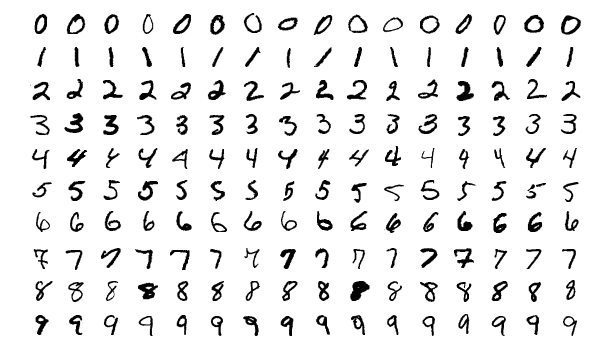

### AIM : Devloping a Neural Network Model that can Read and Classify Handwritten Digits.

>

#### Importing All Necessary Packages 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#### Load Dataset

In [2]:
mnist = keras.datasets.mnist.load_data()
(x1, y1), (x2, y2) = mnist
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
x.shape, y.shape
print('\nDataset loaded succesfully..')
print('Total number of samples in the Dataset :',x.shape[0])
print('Shape of images in the Dataset :',x.shape[1:])
print('\nLabels and number of samples per labels :')
pd.DataFrame({'Labels':np.unique(y,return_counts=True)[0],'Counts':np.unique(y,return_counts=True)[1]})


Dataset loaded succesfully..
Total number of samples in the Dataset : 70000
Shape of images in the Dataset : (28, 28)

Labels and number of samples per labels :


,Labels,Counts
0,0,6903
1,1,7877
2,2,6990
3,3,7141
4,4,6824
5,5,6313
6,6,6876
7,7,7293
8,8,6825
9,9,6958


#### Handling Imbalanced Data

In [3]:
x = x.reshape(x.shape[0],28*28)
x,y = RandomOverSampler().fit_resample(x,y)
x = x.reshape(x.shape[0],28,28,1)
print('\nData is balanced now.')
print('Total number of samples in the Dataset now :',x.shape[0])
print('\nLabels and number of samples per labels now :')
pd.DataFrame({'Labels':np.unique(y,return_counts=True)[0],'Counts':np.unique(y,return_counts=True)[1]})


Data is balanced now.
Total number of samples in the Dataset now : 78770

Labels and number of samples per labels now :


,Labels,Counts
0,0,7877
1,1,7877
2,2,7877
3,3,7877
4,4,7877
5,5,7877
6,6,7877
7,7,7877
8,8,7877
9,9,7877


#### Spliting Data for Training and Testing

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=28)
print('\nTotal number of samples in the Train Dataset now :',xtrain.shape[0])
print('Total number of samples in the Test Dataset now :',xtest.shape[0])
print('\nLabels and number of samples per labels in train dataset now :')
pd.DataFrame({'Labels':np.unique(ytrain,return_counts=True)[0],'Counts':np.unique(ytrain,return_counts=True)[1]})


Total number of samples in the Train Dataset now : 63016
Total number of samples in the Test Dataset now : 15754

Labels and number of samples per labels in train dataset now :


,Labels,Counts
0,0,6302
1,1,6301
2,2,6302
3,3,6302
4,4,6301
5,5,6301
6,6,6301
7,7,6302
8,8,6302
9,9,6302


In [5]:
print('\nLabels and number of samples per labels in test dataset now :')
pd.DataFrame({'Labels':np.unique(ytest,return_counts=True)[0],'Counts':np.unique(ytest,return_counts=True)[1]})


Labels and number of samples per labels in test dataset now :


,Labels,Counts
0,0,1575
1,1,1576
2,2,1575
3,3,1575
4,4,1576
5,5,1576
6,6,1576
7,7,1575
8,8,1575
9,9,1575


#### Some Examples of Training Data

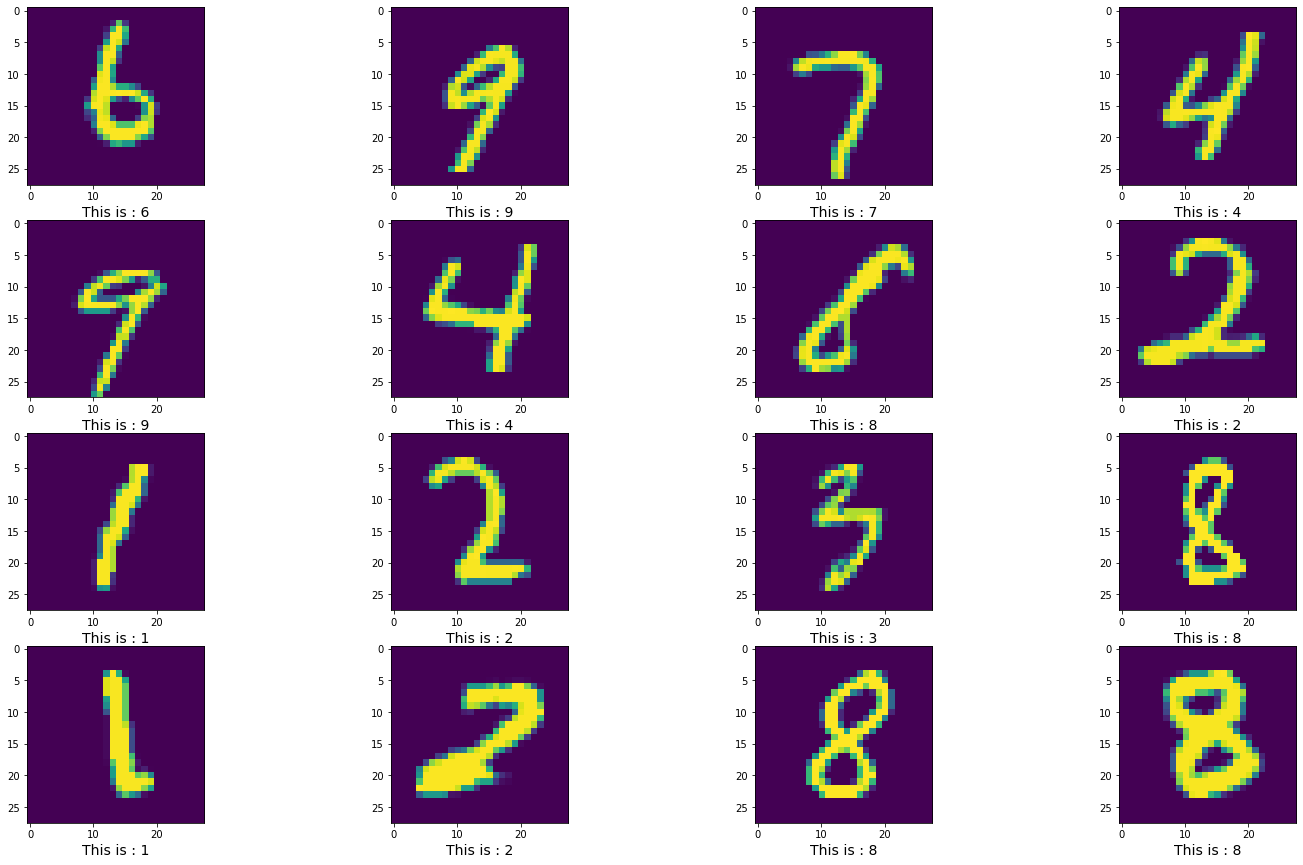

In [6]:
plt.figure(figsize=(25,15))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(xtrain[i])
    label = "This is : " + str(ytrain[i])
    plt.xlabel(label,fontdict={'fontsize':14})

#### Some Examples of Testing Data

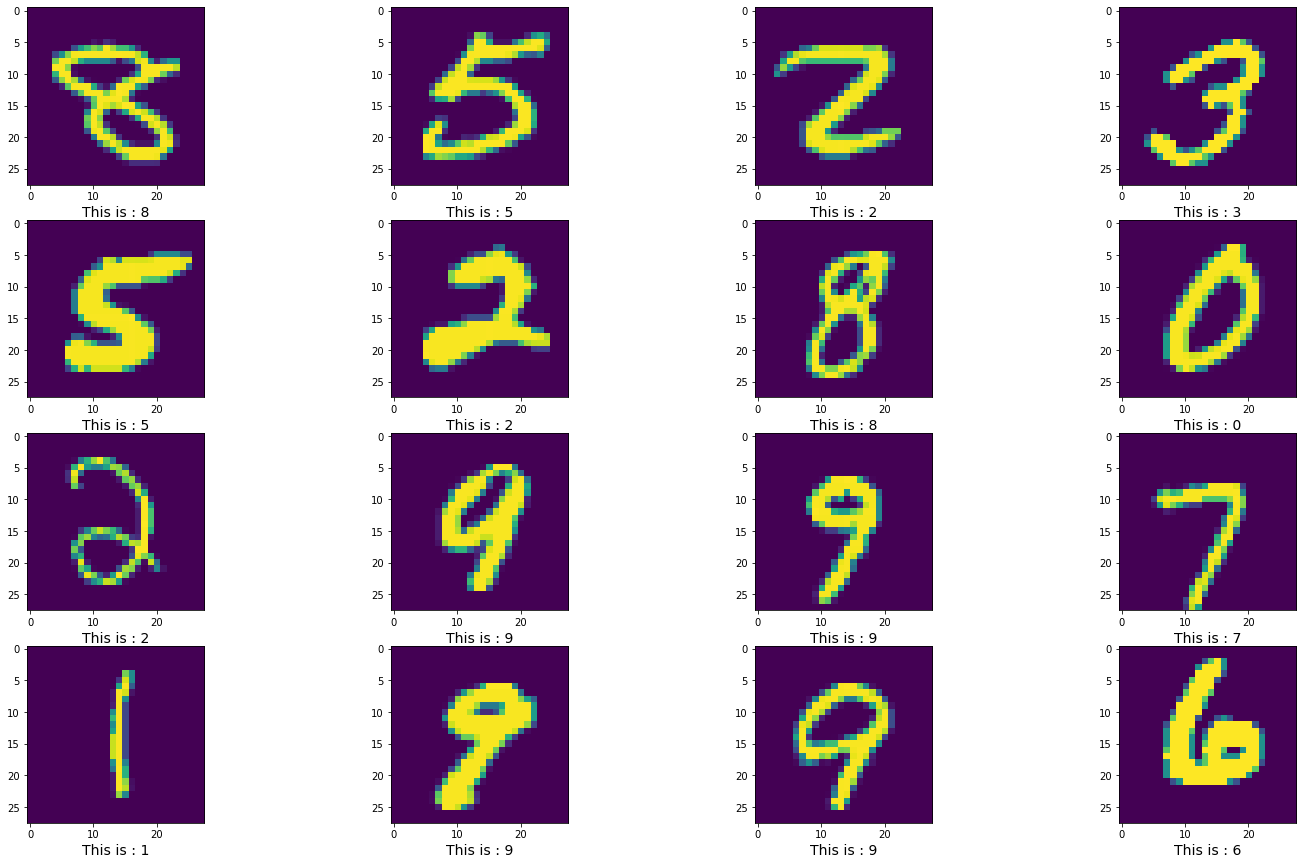

In [7]:
plt.figure(figsize=(25,15))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(xtest[i])
    label = "This is : " + str(ytest[i])
    plt.xlabel(label,fontdict={'fontsize':14})

#### Categorical Encoding

In [8]:
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

#### Normalization

In [9]:
xtrain = xtrain / 255
xtest = xtest / 255

#### Devloping Convolutional Neural Network Model

In [10]:
model = Sequential(
                        [
                            # CNN Layers
                            layers.Conv2D(25,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(50,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(75,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),                            
                            layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            
                            # Flattening Data
                            layers.Flatten(),
                            
                            # Dense Layers
                            layers.Dense(50,activation='relu'),
                            layers.Dropout(0.1),
                            layers.Dense(25,activation='relu'),
                            layers.Dropout(0.05),
                            layers.Dense(10,activation='softmax')
                        ]
                  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        11300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 75)          33825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 75)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 100)         6

#### Model Compilation and Training

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(xtrain,ytrain,batch_size=20,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
3151/3151 [==============================] - 66s 21ms/step - loss: 0.2133 - accuracy: 0.9341 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 2/10
3151/3151 [==============================] - 69s 22ms/step - loss: 0.0619 - accuracy: 0.9829 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 3/10
3151/3151 [==============================] - 68s 21ms/step - loss: 0.0438 - accuracy: 0.9886 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 4/10
3151/3151 [==============================] - 68s 22ms/step - loss: 0.0342 - accuracy: 0.9906 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 5/10
3151/3151 [==============================] - 68s 22ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0479 - val_accuracy: 0.9873
Epoch 6/10
3151/3151 [==============================] - 69s 22ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0507 - val_accuracy: 0.9894
Epoch 7/10
3151/3151 [==============================] - 68s 22ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0438 -

#### Analysis of Training History

In [12]:
training_history = training.history
training_history['epochs'] = range(1,11)
training_history = pd.DataFrame(training_history)
print('\nLoss and Accuracy History per Epochs :')
training_history


Loss and Accuracy History per Epochs :


,loss,accuracy,val_loss,val_accuracy,epochs
0,0.213334,0.934080,0.051437,0.985147,1
1,0.061879,0.982893,0.055491,0.983687,2
2,0.043761,0.988638,0.042614,0.987686,3
3,0.034190,0.990606,0.042752,0.987686,4
4,0.028789,0.992208,0.047938,0.987305,5
5,0.023082,0.993129,0.050736,0.989399,6
6,0.020640,0.994097,0.043762,0.989273,7
7,0.019410,0.994573,0.054449,0.989526,8
8,0.016767,0.995382,0.040857,0.992129,9
9,0.016707,0.995715,0.037288,0.990923,10


#### Visualization of Training History

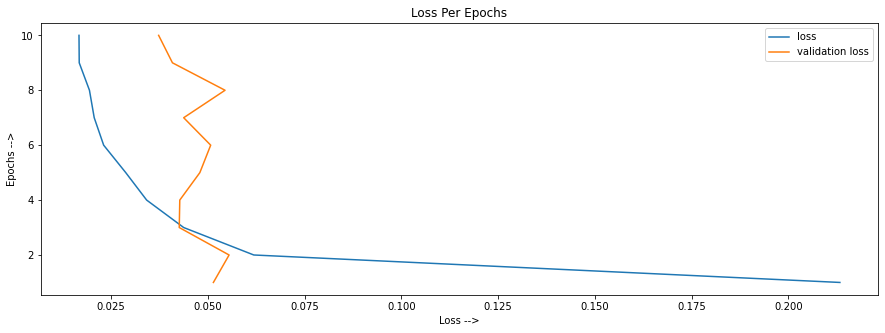

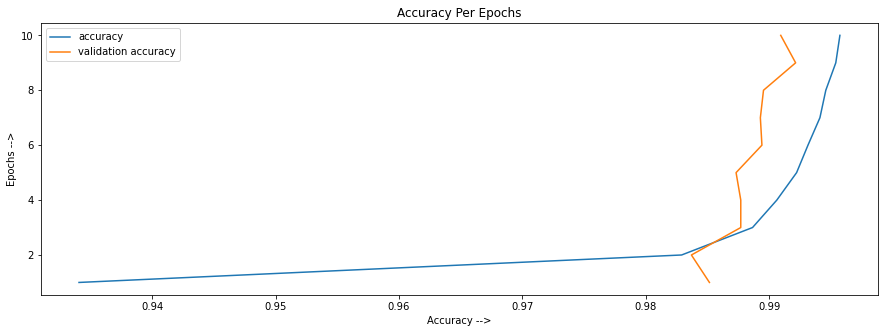

In [13]:
plt.figure(figsize=(15,5))
plt.plot(training_history['loss'],training_history['epochs'])
plt.plot(training_history['val_loss'],training_history['epochs'])
plt.legend(['loss','validation loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Loss -->')
plt.ylabel('Epochs -->')
plt.show()
plt.figure(figsize=(15,5))
plt.plot(training_history['accuracy'],training_history['epochs'])
plt.plot(training_history['val_accuracy'],training_history['epochs'])
plt.legend(['accuracy','validation accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Accuracy -->')
plt.ylabel('Epochs -->')
plt.show()

#### Model Performence Analysis - Confusion Metrics

In [14]:
ytrue = np.array([np.argmax(i) for i in ytest])
ypred = np.array([np.argmax(i) for i in model.predict(xtest)])
print('\nConfusion Matrics : ')
confusion_matrix(ytrue,ypred)


Confusion Matrics : 


array([[1562,    1,    1,    1,    1,    1,    1,    1,    6,    0],
       [   0, 1573,    0,    0,    0,    0,    1,    2,    0,    0],
       [   1,    0, 1564,    5,    0,    0,    0,    2,    3,    0],
       [   0,    2,    5, 1565,    0,    1,    0,    1,    0,    1],
       [   1,    1,    0,    0, 1565,    0,    0,    0,    1,    8],
       [   1,    1,    1,    9,    0, 1554,    3,    1,    5,    1],
       [   4,    0,    3,    0,    2,    1, 1563,    0,    3,    0],
       [   0,   11,    8,    3,    2,    0,    0, 1546,    3,    2],
       [   1,    1,    1,    2,    1,    1,    2,    0, 1563,    3],
       [   1,    0,    1,    3,    9,    0,    0,    4,    1, 1556]],
      dtype=int64)

#### Visualizing Confusion Metrics

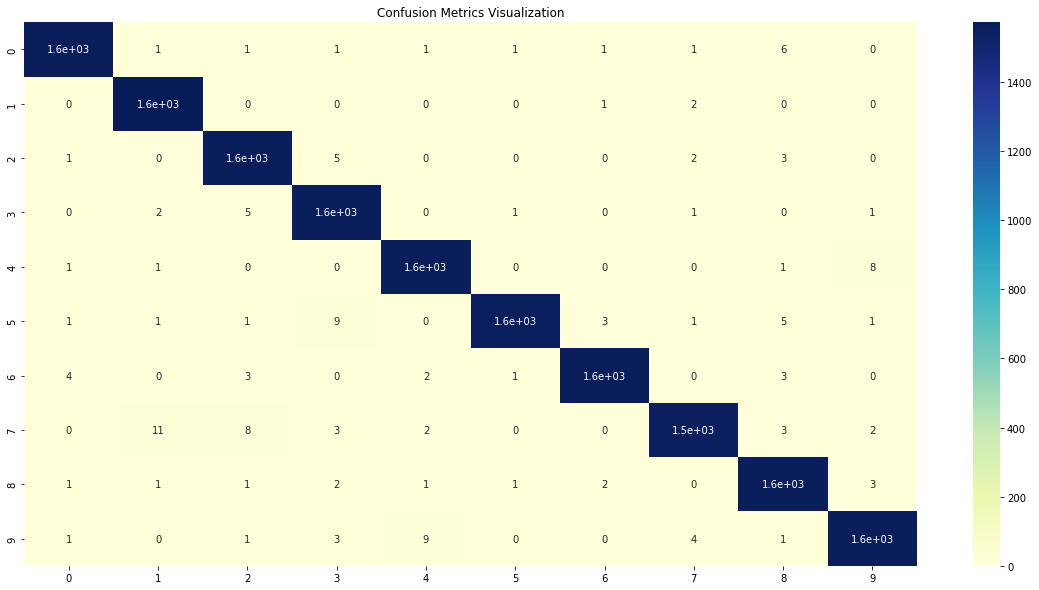

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,cmap='YlGnBu')
plt.title('Confusion Metrics Visualization')
plt.show()

#### Model Performence Analysis - Classification Report

In [16]:
print('\nClassification Report : \n')
print(classification_report(ytrue,ypred))


Classification Report : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1575
           1       0.99      1.00      0.99      1576
           2       0.99      0.99      0.99      1575
           3       0.99      0.99      0.99      1575
           4       0.99      0.99      0.99      1576
           5       1.00      0.99      0.99      1576
           6       1.00      0.99      0.99      1576
           7       0.99      0.98      0.99      1575
           8       0.99      0.99      0.99      1575
           9       0.99      0.99      0.99      1575

    accuracy                           0.99     15754
   macro avg       0.99      0.99      0.99     15754
weighted avg       0.99      0.99      0.99     15754



#### Predictions on few Samples


Predictions on few Samples :



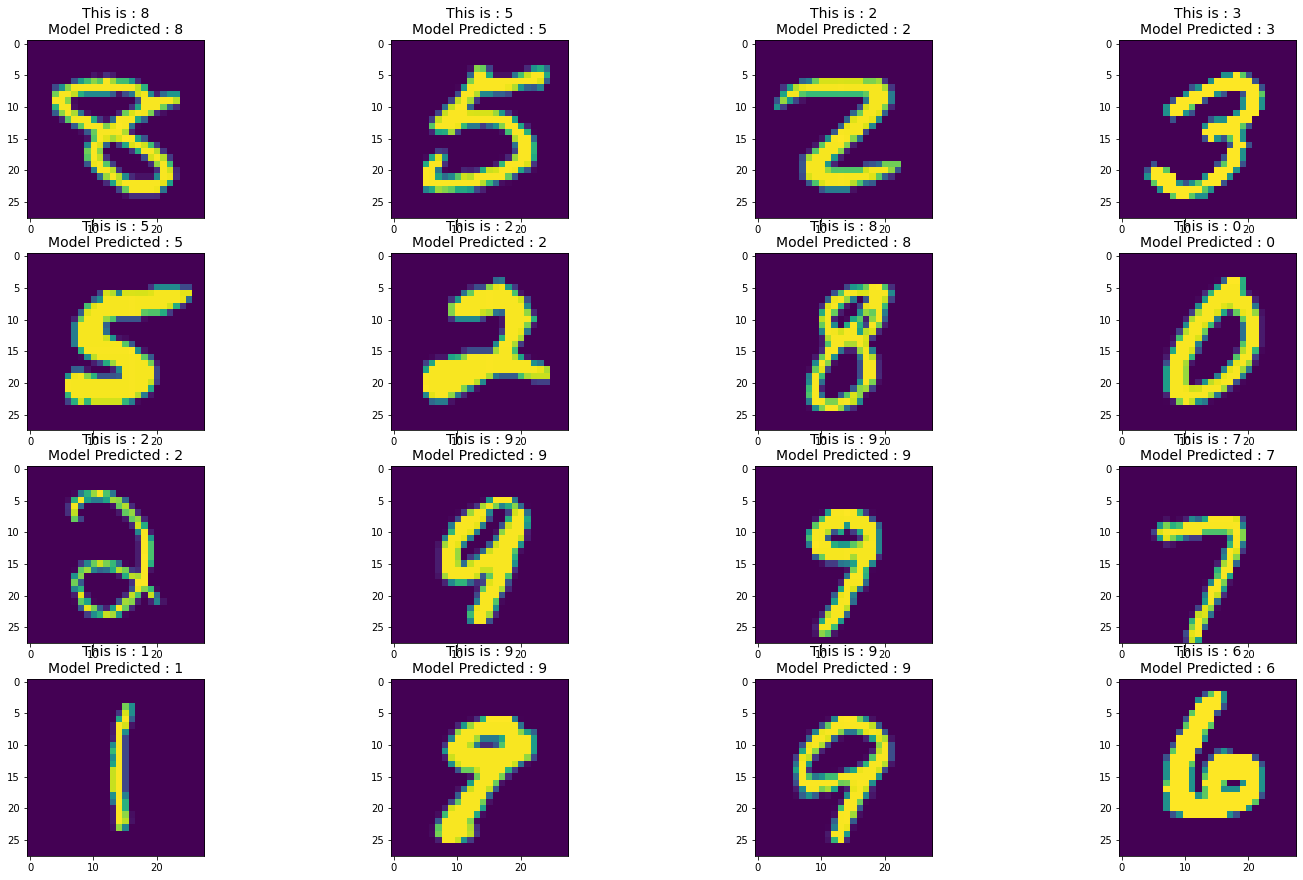

In [17]:
plt.figure(figsize=(25,15))
print('\nPredictions on few Samples :\n')
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(xtest[i])
    prediction = np.argmax(model.predict(np.array([xtest[i]])))
    label = "This is : " + str(ytrue[i]) + '\n' + 'Model Predicted : ' + str(prediction)
    plt.title(label,fontdict={'fontsize':14})

#### Saving Model

In [18]:
model.save('mnist_handwritten_classifier.h5')

# Thank You